In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd
df = pd.read_csv('car_prices.csv', index_col=0)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


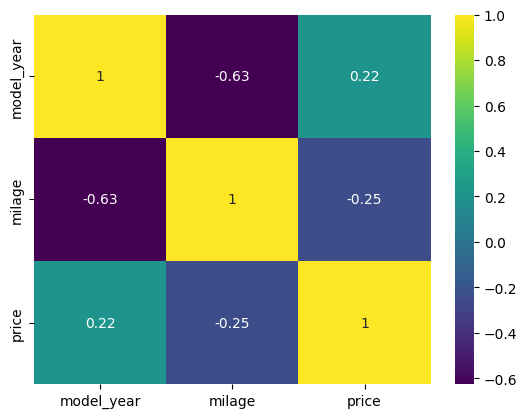

In [4]:
sns.heatmap(df.select_dtypes('number').corr(), annot = True, cmap = 'viridis')
plt.show()

### RMSE va koeffitsentlarni chiqarib olamiz

Linear RMSE: 50602.26733102121
Ridge RMSE: 50602.26743718523
Lasso RMSE: 50602.267697655676
Linear koeffitsientlari: [[-2.70860076e-01  1.25725477e+03]]
Ridge koeffitsientlari: [[-2.70860181e-01  1.25725326e+03]]
Lasso koeffitsientlari: [-2.70860438e-01  1.25724954e+03]


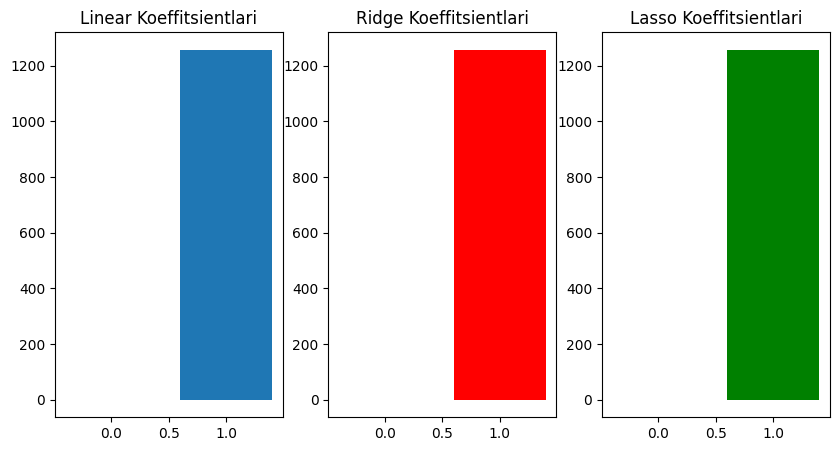

In [5]:
cols = ['milage', 'model_year']
X = df[cols]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regressiya
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = rmse(y_test, linear_predictions)
print(f"Linear RMSE: {linear_rmse}")

# Ridge Regressiya
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_rmse = rmse(y_test, ridge_predictions)
print(f"Ridge RMSE: {ridge_rmse}")

# Lasso Regressiya
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_rmse = rmse(y_test, lasso_predictions)
print(f"Lasso RMSE: {lasso_rmse}")

# Model koeffitsientlari
print("Linear koeffitsientlari:", linear_model.coef_)
print("Ridge koeffitsientlari:", ridge_model.coef_)
print("Lasso koeffitsientlari:", lasso_model.coef_)

# Koeffitsientlarni ko'rsatish uchun grafik
plt.figure(figsize=(10, 5))

# Linear koeffitsientlari
plt.subplot(1, 3, 1)
plt.bar(range(len(linear_model.coef_[0])), linear_model.coef_[0])
plt.title('Linear Koeffitsientlari')

# Ridge koeffitsientlari
plt.subplot(1, 3, 2)
plt.bar(range(len(ridge_model.coef_[0])), ridge_model.coef_[0], color = 'red')
plt.title('Ridge Koeffitsientlari')

# Lasso koeffitsientlari
plt.subplot(1, 3, 3)
plt.bar(range(len(lasso_model.coef_)), lasso_model.coef_, color = 'green')
plt.title('Lasso Koeffitsientlari')

plt.show()


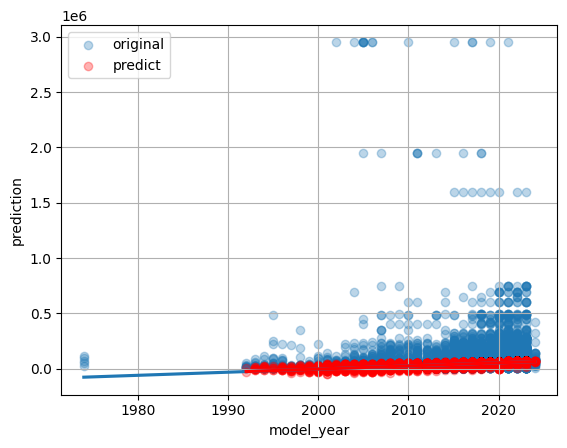

In [6]:
# Linear regressianing predection va original qismlarining grafigini chizib ko'rdim
test_data = X_test.copy()
test_data['price'] = y_test.values
test_data['prediction'] = linear_predictions
sns.regplot(x = 'model_year', y = 'price', data = df, label = 'original', scatter_kws={'alpha':0.3})
sns.regplot(x = 'model_year', y = 'prediction', data = test_data, label = 'predict', scatter_kws={'alpha':0.3}, color='red')
plt.grid()
plt.legend()
plt.show()

### Ridge regressiondan foydalanib best_estimatorlarni topib oldim ***alpha*** va ***solver*** uchun (linspace yoki logspace ishlatilmagan)


In [7]:
ridge = Ridge()

ridge_params = {
    'alpha': [0.1, 1.0, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

ridge_grid = GridSearchCV(
    ridge,
    ridge_params, 
    cv = 5,
    scoring='neg_mean_squared_error'
)

ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='neg_mean_squared_error')

In [8]:
ridge_grid.best_score_

np.float64(-5540095701.412846)

In [9]:
print('Best parameters for ridge:', ridge_grid.best_params_)
print("Best cross-validation RMSE for Ridge:", np.sqrt(-ridge_grid.best_score_))

Best parameters for ridge: {'alpha': 100, 'solver': 'svd'}
Best cross-validation RMSE for Ridge: 74431.81914620148


In [10]:
ridge_grid.best_estimator_

Ridge(alpha=100, solver='svd')

In [17]:
print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best cross-validation RMSE for Ridge:", np.sqrt(-ridge_grid.best_score_))

ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
print("Test RMSE for Ridge:", mse(y_test, y_pred_ridge, squared=False))

Best parameters for Ridge: {'alpha': 100, 'solver': 'svd'}
Best cross-validation RMSE for Ridge: 74431.81914620148
Test RMSE for Ridge: 50602.2779503431


### Lasso regression

In [12]:
lasso = Lasso()

lasso_params = {
    'alpha': np.linspace(-4, 1, 100),
    'max_iter': [1000, 5000, 1000]
}

lasso_grid = GridSearchCV(lasso,
                          lasso_params, 
                          cv = 5, 
                          scoring = 'neg_mean_squared_error')

lasso_grid.fit(X_train, y_train)

print("Best parameter for Lasso:", lasso_grid.best_params_)
print("Best cross-validation RMSE for Lasso:", np.sqrt(-lasso_grid.best_score_))

lasso_best = lasso_grid.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)
print("Test RMSE for Lasso:", mse(y_test, y_pred_lasso, squared=False))

Best parameter for Lasso: {'alpha': np.float64(0.040404040404040664), 'max_iter': 1000}
Best cross-validation RMSE for Lasso: 74431.81953212242
Test RMSE for Lasso: 50602.26747915489


### ElasticNetdan foydalanib ko'ramiz

In [13]:
elasticnet = ElasticNet()

elasticnet_params = {
    'alpha': np.linspace(0.1, 100, 100), # kamaytirdim iteratsiyani
    'l1_ratio': np.linspace(0.1, 1.0, 10),
}

elasticnet_grid = GridSearchCV(elasticnet, 
                                     elasticnet_params, 
                                     cv=5, 
                                     scoring='neg_mean_squared_error',
                                     n_jobs=2) # operativkaning 2ta yadrosini berdim tezroq ishlashi uchun
elasticnet_grid.fit(X_train, y_train)

print("Best parameters for ElasticNet:", elasticnet_grid.best_params_)
print("Best cross-validation RMSE for ElasticNet:", np.sqrt(-elasticnet_grid.best_score_))

elasticnet_best = elasticnet_grid.best_estimator_
y_pred_elasticnet = elasticnet_best.predict(X_test)
print("Test RMSE for ElasticNet:", mse(y_test, y_pred_elasticnet, squared=False))

Best parameters for ElasticNet: {'alpha': np.float64(1.1090909090909091), 'l1_ratio': np.float64(0.9)}
Best cross-validation RMSE for ElasticNet: 74431.81147863793
Test RMSE for ElasticNet: 50602.78907959093


### RandomGridSearch

In [14]:
ridge = Ridge()

ridge_params = {
    'alpha': np.logspace(-4, 4, 1000),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

ridge_random = RandomizedSearchCV(ridge, 
                                  ridge_params, 
                                  cv=5, scoring='neg_mean_squared_error', 
                                  n_iter=100, 
                                  random_state=42,
                                  n_jobs=2) # operativkaning 2ta yadrosini berdim tezroq ishlashi uchun
ridge_random.fit(X_train, y_train)

print("Best parameters for Ridge:", ridge_random.best_params_)
print("Best cross-validation RMSE for Ridge:", np.sqrt(-ridge_random.best_score_))

ridge_best = ridge_random.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
print("Test RMSE for Ridge:", mse(y_test, y_pred_ridge, squared=False))

Best parameters for Ridge: {'solver': 'cholesky', 'alpha': np.float64(1114.415251466788)}
Best cross-validation RMSE for Ridge: 74431.8157656432
Test RMSE for Ridge: 50602.38600665886


### Logspaceni tahlil qilib koramiz

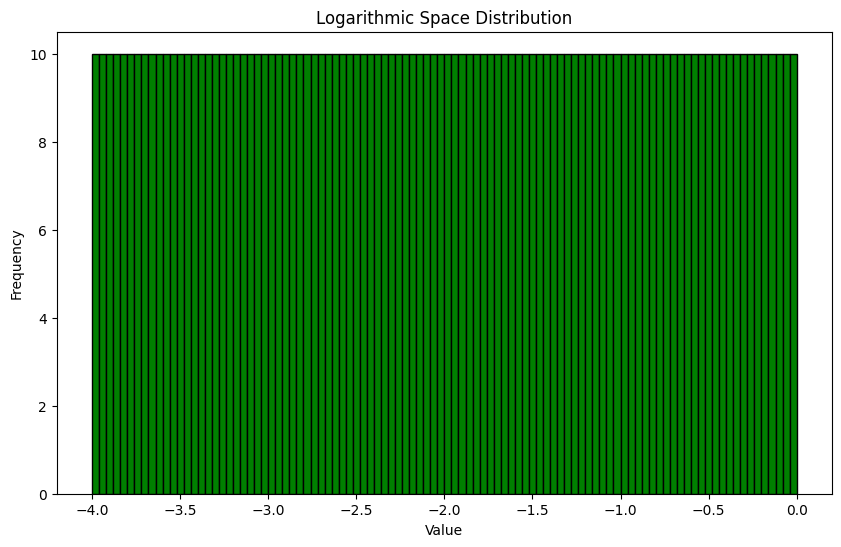

In [15]:
import numpy as np
import matplotlib.pyplot as plt

logspace_data = np.linspace(-4, 0, 1000)

plt.figure(figsize=(10, 6))
plt.hist(logspace_data, bins=100, color='green', edgecolor='black')
plt.title('Logarithmic Space Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
